In [1]:
from cnn.input import PascalVOC2012Dataset, Dataloader, visualize
import os

2022-07-07 21:23:58.025257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/guilherme/git/segqnas/.venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-07 21:23:58.025276: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
dataset_descriptor_filepath = os.path.join(
    'pascalvoc12',
    'VOCdevkit',
    'VOC2012',
    'ImageSets',
    'Segmentation',
    'train.txt',
)
images_path = os.path.join(
    'pascalvoc12', 
    'VOCdevkit', 
    'VOC2012', 
    'JPEGImages'
)

masks_path = os.path.join(
    'pascalvoc12', 
    'VOCdevkit', 
    'VOC2012', 
    'SegmentationClass'
) 

In [3]:
dataset = PascalVOC2012Dataset(
    dataset_descriptor_filepath,
    images_path=images_path,
    masks_path=masks_path,
)

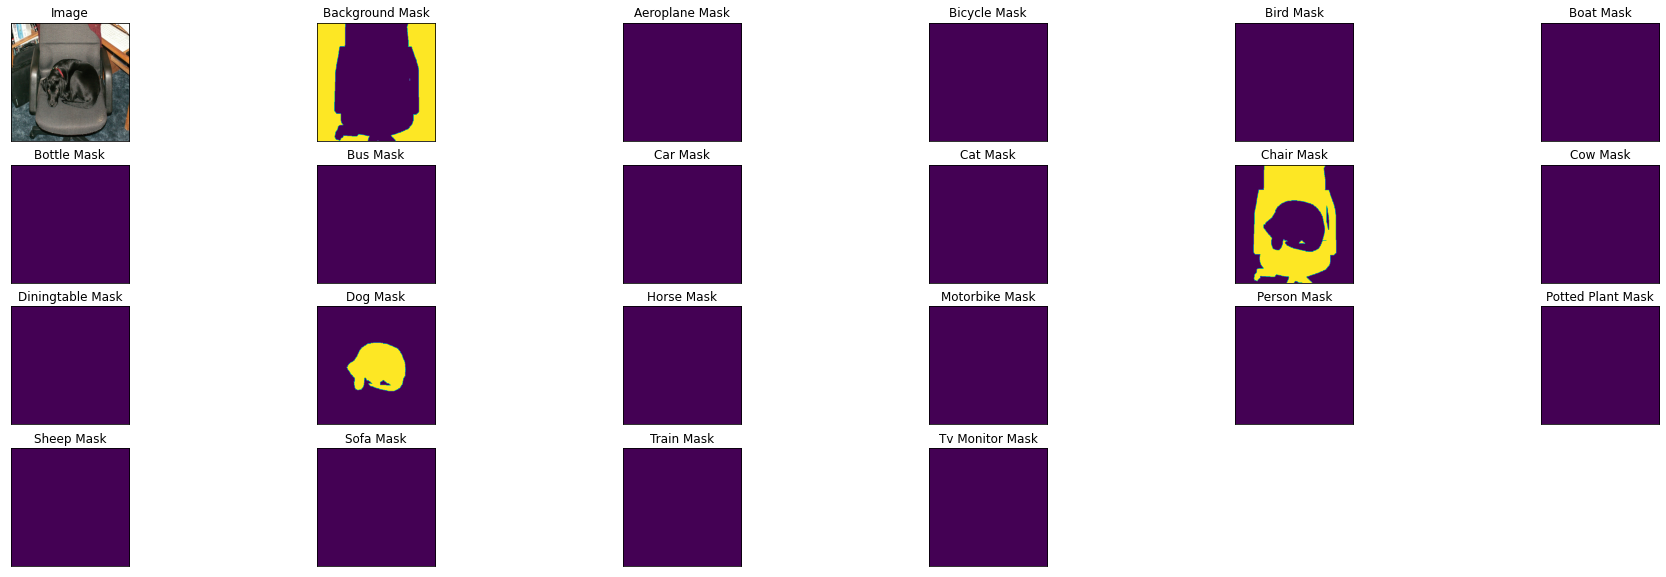

In [6]:
image, mask = dataset[2] # get some sample

visualize(
    image=image, 
    background_mask=mask[..., 0].squeeze(),
    aeroplane_mask=mask[..., 1].squeeze(),
    bicycle_mask=mask[..., 2].squeeze(),
    bird_mask=mask[..., 3].squeeze(),
    boat_mask=mask[..., 4].squeeze(),
    bottle_mask=mask[..., 5].squeeze(),
    bus_mask=mask[..., 6].squeeze(),
    car_mask=mask[..., 7].squeeze(),
    cat_mask=mask[..., 8].squeeze(),
    chair_mask=mask[..., 9].squeeze(),
    cow_mask=mask[..., 10].squeeze(),
    diningtable_mask=mask[..., 11].squeeze(),
    dog_mask=mask[..., 12].squeeze(),
    horse_mask=mask[..., 13].squeeze(),
    motorbike_mask=mask[..., 14].squeeze(),
    person_mask=mask[..., 15].squeeze(),
    potted_plant_mask=mask[..., 16].squeeze(),
    sheep_mask=mask[..., 17].squeeze(),
    sofa_mask=mask[..., 18].squeeze(),
    train_mask=mask[..., 19].squeeze(),
    tv_monitor_mask=mask[..., 20].squeeze(),
)